In [1]:
import sys
sys.path.insert(0, 'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\frxas.py') #\\impedance')


from frxas import models
import matplotlib.pyplot as plt
import numpy as np

import lmfit
from lmfit import Parameters, minimize, report_fit

%reload_ext autoreload
%autoreload 2

### Simulate some data sets

In [80]:
np.random.seed(121)

# Give x arrays different end points and different length vectors since that
# is the case for real data.

x = []
x.append(np.linspace(0, 80 , 20))
x.append(np.linspace(0, 60 , 26))
x.append(np.linspace(0, 70 , 18))

data = []
params = Parameters()

for i in np.arange(3):
    ld = 10 + 30 * np.random.rand()
    tg = 1 + 2.5 * np.random.rand()
    Ao = 1 + 2 * np.random.rand()
    f =  i + 1
    
    params.add('ld_%i' % (i+1), value=ld, min=0.0, max=200)
    params.add('tg_%i' % (i+1), value=tg, min=0.01, max=100.0)
    params.add('Ao_%i' % (i+1), value=Ao, min=0.01, max=100.0)
    params.add('f_%i' % (i+1), value=f, vary=False)
    
    dat = models.chi_ideal(x[i], ld, tg, Ao, f) +\
        np.random.normal(size=x[i].size, scale=0.001)
    data.append(dat)
    print('ld_%i : %.3f tg_%i : %.3f Ao_%i : %.1f f_%i : %.1f' % \
          (i+1, ld, i+1, tg, i+1, Ao, i+1, f))
data = np.array(data)

ld_1 : 13.340 tg_1 : 1.527 Ao_1 : 1.5 f_1 : 1.0
ld_2 : 32.355 tg_2 : 2.279 Ao_2 : 1.9 f_2 : 2.0
ld_3 : 32.949 tg_3 : 2.997 Ao_3 : 2.9 f_3 : 3.0


Create sets of parameters for each data set. These parameters should be 
adjusted based on the details of each model. Looping through this way sets
the initial value of each parameter to be the same across data sets, which
may not be desirable. Note: frequencies, f, are experimentally controlled variables so they should not vary

In [86]:
fit_params = Parameters()
for iy, y in enumerate(data):
    fit_params.add('ld_%i' % (iy+1), value=20, min=0.0, max=200)
    fit_params.add('tg_%i' % (iy+1), value=3, min=0.01, max=100.0)
    fit_params.add('Ao_%i' % (iy+1), value=1.5, min=0.01, max=100.0)
    fit_params.add('f_%i' % (iy+1), value= iy +1, vary=False)

#### Now use lmfit's minimize function to fit this model to the data and report
#### fitting results!

In [4]:
out = minimize(models.objective_fun, fit_params, args=(x, data, models.chi_ideal))
report_fit(out.params)

[[Variables]]
    ld_1:  13.2124220 +/- 0.18044269 (1.37%) (init = 20)
    tg_1:  1.49819235 +/- 0.04070143 (2.72%) (init = 3)
    Ao_1:  1.46615786 +/- 0.00151287 (0.10%) (init = 1.5)
    f_1:   1 (fixed)
    ld_2:  33.1956949 +/- 1.22438045 (3.69%) (init = 20)
    tg_2:  2.39402224 +/- 0.17540626 (7.33%) (init = 3)
    Ao_2:  1.94046074 +/- 0.00224748 (0.12%) (init = 1.5)
    f_2:   2 (fixed)
    ld_3:  37.4134597 +/- 7.19620659 (19.23%) (init = 20)
    tg_3:  3.87670772 +/- 1.48909121 (38.41%) (init = 3)
    Ao_3:  2.91529105 +/- 0.00593548 (0.20%) (init = 1.5)
    f_3:   3 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(ld_3, tg_3) =  1.000
    C(ld_2, tg_2) =  0.999
    C(ld_1, tg_1) =  0.994
    C(ld_2, Ao_2) =  0.475
    C(tg_2, Ao_2) =  0.463
    C(ld_3, Ao_3) =  0.342
    C(tg_3, Ao_3) =  0.338
    C(ld_1, Ao_1) =  0.338
    C(tg_1, Ao_1) =  0.307


#### Finally, plot the results.

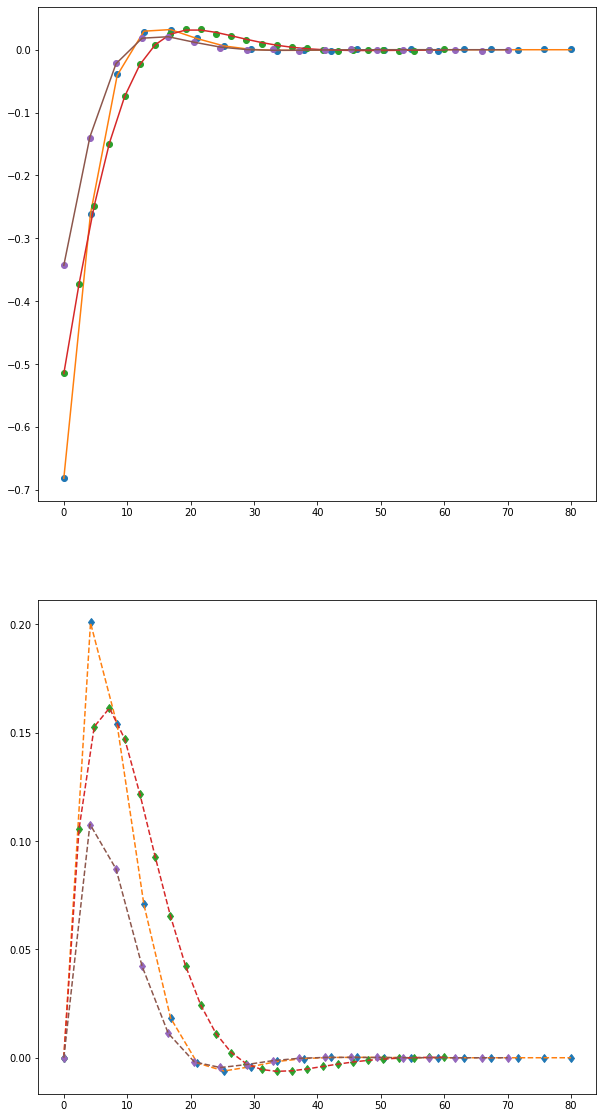

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,20))
for i in range(3):
    y_fit = models.dataset_fun(out.params, i, x[i], models.chi_ideal)
    ax1.plot(x[i], data[i].real, 'o', x[i], y_fit.real, '-')
    ax2.plot(x[i], data[i].imag, 'd', x[i], y_fit.imag, '--')
plt.show()